# Image Colour Extraction Project Using KMeans Clustering Algorithm!

In [63]:
# Importing Required Libraries
from cv2 import imread, cvtColor, COLOR_BGR2RGB
from matplotlib.pyplot import show, plot, imshow, subplots, legend, xlabel, ylabel, title
from numpy import reshape, full, unique
from sklearn.cluster import KMeans

In [5]:
# Importing Image
image = imread("../../docs/Images/reasoning.jpg")

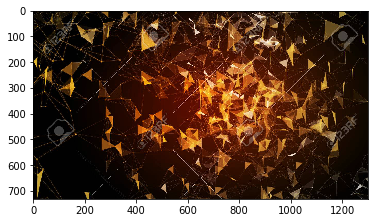

In [8]:
# Displaying Image in BGR Format!
imshow(image)
show()

In [10]:
# Converting Image from BGR to RGB
image = cvtColor(image, COLOR_BGR2RGB)

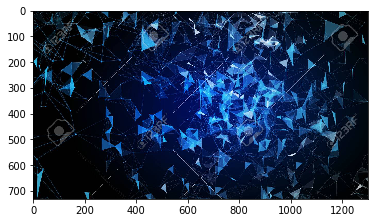

In [11]:
# Displaying Image in RGB Format!
imshow(image)
show()

In [15]:
# Converting Image into Dimesnion <= 2 which is accepted by KMeans fir method
pixels = image.reshape(image.shape[0] * image.shape[1], image.shape[2])

In [16]:
pixels.shape

(950300, 3)

In [19]:
''' Defining an empty list which will be used to store all the sum of distances for each cluster as 
    calculated by KMeans algorithm.
'''
wcss = []

# Obtaining the best number of clusters to cluster the image
for i in range(1, 10):
    estimator = KMeans(n_clusters = i, random_state = 5)
    estimator.fit(pixels)
    wcss.append(estimator.inertia_)

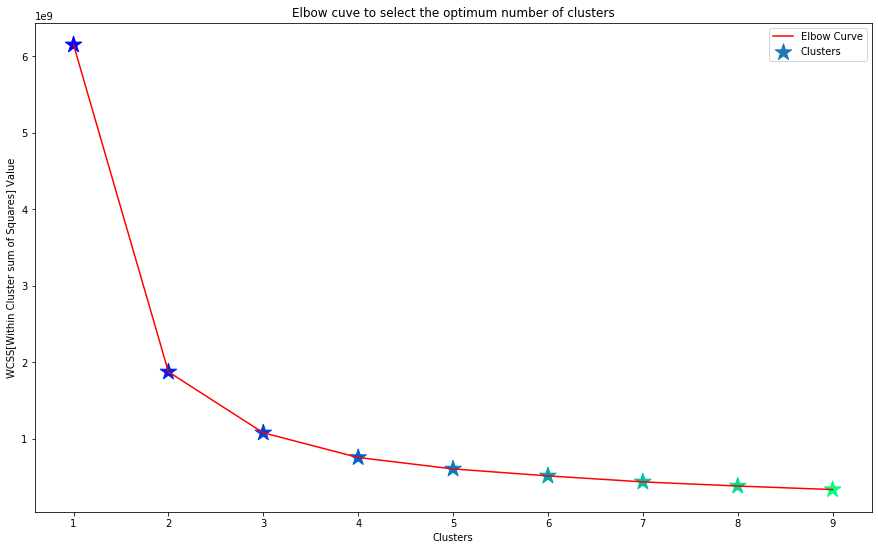

In [53]:
# Plotting the graph
fig, ax = subplots(figsize = (15,9))

ax.scatter(range(1, 10),
           wcss,
           label = "Clusters",
           c = range(1, 10),
           s = 300,
           cmap = "winter",
           marker = '*' )

ax.plot(range(1, 10),
        wcss,
        label = "Elbow Curve",
        c = "red" )

title("Elbow cuve to select the optimum number of clusters")
xlabel("Clusters")
ylabel("WCSS[Within Cluster sum of Squares] Value")
legend()
show()

### From the above Elbow curve we can easily see that clusters = 3 would be a good option to go with

### Applying KMeans to the pixels!

In [54]:
# Making another KMeans classifier
clf = KMeans(n_clusters = 3)

# Fitting data to the Model
clf.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [59]:
# Creating a random array in which extracted colour Image will be stored
new_image = full(shape = (image.shape[0] * image.shape[1], image.shape[2]), fill_value = 7)
new_image.shape

(950300, 3)

In [61]:
# Checking centers of the clusters
centers = clf.cluster_centers_
centers

array([[  2.24934884,   8.33293516,  23.99815868],
       [ 59.46055078, 130.38178574, 197.02486264],
       [ 17.33814858,  39.87036449,  92.18475028]])

In [64]:
# Checking Labels
unique(clf.labels_, return_counts = True)

(array([0, 1, 2], dtype=int32), array([576235, 119678, 254387]))

In [65]:
# Constructing New Image
for i in range(new_image.shape[0]):
    new_image[i] = centers[clf.labels_[i]]

In [66]:
# Viewing Image Head Values just for a glimpse
new_image[:5]

array([[ 2,  8, 23],
       [ 2,  8, 23],
       [ 2,  8, 23],
       [ 2,  8, 23],
       [ 2,  8, 23]])

In [67]:
# Converting new generated image to proper shape
new_image = new_image.reshape(image.shape[0], image.shape[1], image.shape[2])

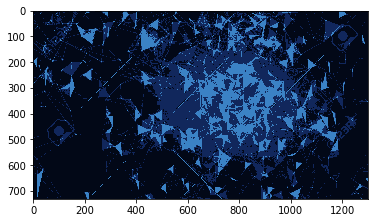

In [68]:
imshow(new_image)
show()

# This is all for the project, hope it helped a lot!